# Data Science - Assignment
Use the following Dataset:-
- Lichess Games Data: https://www.kaggle.com/datasets/datasnaek/chess/data

## Problem Statement

Understand the data and approach for the following:
1. Provide insights on the data such as:
- General trends of ‘White’ players with respect to ‘Black’ players
- Any trend of winners with respect to turns and match time?
- Go to openings with respect to rank and color.


Provide additional relevant insights that portray information regarding the overall player population on Lichess. Go for quality insights over quantity insights.

2. Using the opening moves, opening styles, color, and other features, Is it possible to predict the winner of a match to a certain degree? Explain your answer.


Note:-
Please provide files in an accessible format. The results and charts must be reproducible.
Explaining logic and steps taken throughout the process will help you showcase yourself better.
The dataset is publicly available, hence there are various solutions available online. You may take references for inspiration, but the final submissions must have originality and quality.

## Data Information

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them. 


This set contains the:
* Game ID;
* Rated (T/F);
* Start Time;
* End Time;
* Number of Turns;
* Game Status;
* Winner;
* Time Increment;
* White Player ID;
* White Player Rating;
* Black Player ID;
* Black Player Rating;
* All Moves in Standard Chess Notation;
* Opening Eco (Standardised Code for any given opening, list here);
* Opening Name;
* Opening Ply (Number of moves in the opening phase)


## Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Importing and Reading dataset


In [2]:
df = pd.read_csv('games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Data Understanding

In [3]:
df.shape

(20058, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [5]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    19629
True       429
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,1.962900e+04,1.962900e+04,19629.000000,19629.000000,19629.000000,19629.000000
mean,1.483721e+12,1.483722e+12,60.458607,1596.090224,1588.324622,4.804422
std,2.809364e+10,2.809353e+10,33.502852,290.165038,290.164447,2.792791
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477530e+12,1.477530e+12,37.000000,1400.000000,1393.000000,3.000000
50%,1.495830e+12,1.495830e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503107e+12,1.503110e+12,79.000000,1791.000000,1783.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000



1. Number of Games and Observations:

There are a total of 19,629 observations (or games) in the dataset.

2. Timestamps:

The created_at and last_move_at columns represent timestamps indicating when the games were created and when the last move was made, respectively.
The timestamps seem to be in a numerical format (e.g., 1.96E+04) and may need to be converted to a human-readable format for better interpretation.

3. Game Characteristics:

On average, games consist of approximately 60 moves (turns), with a standard deviation of about 33 moves.
The minimum number of moves in a game is 1, while the maximum is 349 moves.
The majority of games fall within the 25th and 75th percentiles, suggesting that most games have between 37 and 79 moves.

4. Player Ratings:

The white_rating and black_rating columns represent the ratings of the white and black players, respectively.
On average, white players have a slightly higher rating (about 1596) compared to black players (about 1588).
Ratings range from a minimum of 784 to a maximum of 2723, indicating a broad spectrum of player skill levels.

5. Opening Moves:

The opening_ply column indicates the number of moves played in the opening phase of each game.
On average, around 5 moves are played in the opening phase, with a standard deviation of approximately 3 moves.
The minimum number of opening moves is 1, and the maximum is 28 moves.

In [9]:
df.describe(exclude=np.number).T

,count,unique,top,freq
id,19629,19113,WbTSc5pg,2
rated,19629,2,True,15817
victory_status,19629,4,resign,10926
winner,19629,3,white,9792
increment_code,19629,400,10+0,7563
white_id,19629,9438,bleda,48
black_id,19629,9331,king5891,44
moves,19629,18920,e4 e5,27
opening_eco,19629,365,A00,992
opening_name,19629,1477,Van't Kruijs Opening,363


1. ID:

There are 19,629 unique game IDs (id), out of which 19113 are unique. This suggests that some games might have occurred multiple times or have duplicate entries.

2. Game Characteristics:

All games in the dataset are rated (rated), with 15,817 of them being classified as "TRUE".
There are four distinct victory_status categories, with "resign" being the most common, occurring 10,926 times.
The winner column indicates the outcome of the game, with "white" winning in 9,792 games.
The increment_code column indicates the time control used in the game, with "10+0" being the most common, occurring 7,563 times.
The dataset contains 19,629 moves (moves), with "e4 e5" being the most common move sequence, appearing 27 times.

3. Players and Openings:

There are a total of 9,438 unique white players (white_id) and 9,331 unique black players (black_id) in the dataset.
The opening_eco column contains 365 unique values, with "A00" being the most common ECO code, occurring 992 times.
The opening_name column contains 1,477 unique opening names, with "Van't Kruijs Opening" being the most common, appearing 363 times.

## 1.1 General trend of white player vs black player


In [10]:
white_players = df[df['winner']=='white']
black_players = df[df['winner']=='black']

avg_white_rating = white_players['white_rating'].mean()
avg_black_rating = black_players['black_rating'].mean()

avg_white_turns = white_players['turns'].mean()
avg_black_turns = black_players['turns'].mean()

avg_white_duration = (white_players['last_move_at']-white_players['created_at']).mean()
avg_black_duration = (black_players['last_move_at']-black_players['created_at']).mean()

winner_distribution = df['winner'].value_counts()


print("General Trends of 'White' Players vs. 'Black' Players:")
print("Average White Rating:", avg_white_rating)
print("Average Black Rating:", avg_black_rating)
print("Average White Turns:", avg_white_turns)
print("Average Black Turns:", avg_black_turns)
print("Average White Match Duration:", avg_white_duration)
print("Average Black Match Duration:", avg_black_duration)
print("Distribution of Winners:", winner_distribution)

General Trends of 'White' Players vs. 'Black' Players:
Average White Rating: 1633.7576593137255
Average Black Rating: 1637.6668909070524
Average White Turns: 57.75888480392157
Average Black Turns: 60.72698733041821
Average White Match Duration: 853283.8910334967
Average Black Match Duration: 835243.9871061778
Distribution of Winners: white    9792
black    8919
draw      918
Name: winner, dtype: int64


## 1.2 Trends of Winners with Respect to Turns and Match Time


In [11]:
turns_winner_correlation = df.groupby('winner')['turns'].mean()

df['match_duration'] = df['last_move_at'] - df['created_at']
match_duration_winner_correlation = df.groupby('winner')['match_duration'].mean()

print("\nTrends of Winners with Respect to Turns and Match Time:")
print("Correlation between Number of Turns and Winner:")
print(turns_winner_correlation)
print("Correlation between Match Duration and Winner:")
print(match_duration_winner_correlation)


Trends of Winners with Respect to Turns and Match Time:
Correlation between Number of Turns and Winner:
winner
black    60.726987
draw     86.648148
white    57.758885
Name: turns, dtype: float64
Correlation between Match Duration and Winner:
winner
black    8.352440e+05
draw     1.379071e+06
white    8.532839e+05
Name: match_duration, dtype: float64


## 1.3 Openings with Respect to Rank and Color


In [12]:
top_openings_white = df[df['winner'] == 'white']['opening_name'].value_counts().head(5)
top_openings_black = df[df['winner'] == 'black']['opening_name'].value_counts().head(5)

opening_rank_correlation = df.groupby('opening_name')['white_rating', 'black_rating'].mean()

print("\nOpenings with Respect to Rank and Color:")
print("Top Openings for White Players:")
print(top_openings_white)
print("Top Openings for Black Players:")
print(top_openings_black)
print("Correlation between Opening and Player's Rank:")
print(opening_rank_correlation)


Openings with Respect to Rank and Color:
Top Openings for White Players:
Scandinavian Defense: Mieses-Kotroc Variation    159
Sicilian Defense                                 147
Scotch Game                                      141
French Defense: Knight Variation                 133
Van't Kruijs Opening                             123
Name: opening_name, dtype: int64
Top Openings for Black Players:
Van't Kruijs Opening                224
Sicilian Defense                    191
Sicilian Defense: Bowdler Attack    162
Scandinavian Defense                122
French Defense: Knight Variation    118
Name: opening_name, dtype: int64
Correlation between Opening and Player's Rank:
                                      white_rating  black_rating
opening_name                                                    
Alekhine Defense                       1447.720930   1378.232558
Alekhine Defense #2                    1533.333333   1460.333333
Alekhine Defense #3                    1414.000000   155

C:\Users\sobhr\AppData\Local\Temp\ipykernel_16896\2188495737.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  opening_rank_correlation = df.groupby('opening_name')['white_rating', 'black_rating'].mean()


## Data Visualization

In [13]:
# We will drop some Non-contributing columns for visualization and modelling purposes

df_copy = df.drop(['id','white_id', 'black_id','created_at','last_move_at','increment_code','moves','match_duration','opening_eco', 'opening_name'],axis=1)

In [14]:
df_copy

,rated,turns,victory_status,winner,white_rating,black_rating,opening_ply
0,False,13,outoftime,white,1500,1191,5
1,True,16,resign,black,1322,1261,4
2,True,61,mate,white,1496,1500,3
3,True,61,mate,white,1439,1454,3
4,True,95,mate,white,1523,1469,5
...,...,...,...,...,...,...,...
20053,True,24,resign,white,1691,1220,2
20054,True,82,mate,black,1233,1196,2
20055,True,35,mate,white,1219,1286,3
20056,True,109,resign,white,1360,1227,4


In [15]:
# Seperating numeric data and categoric data

numeric_columns = df_copy.select_dtypes(include=np.number).columns
categoric_columns = df_copy.select_dtypes(exclude=np.number).columns

numeric_columns,categoric_columns

(Index(['turns', 'white_rating', 'black_rating', 'opening_ply'], dtype='object'),
 Index(['rated', 'victory_status', 'winner'], dtype='object'))

### Uni - Variante - Analysis

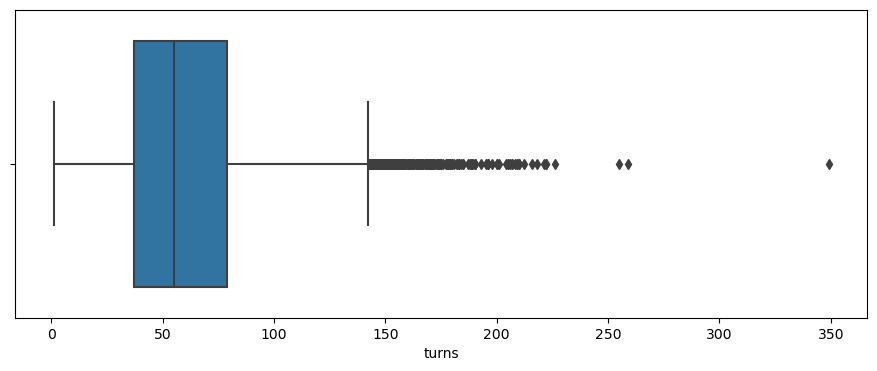

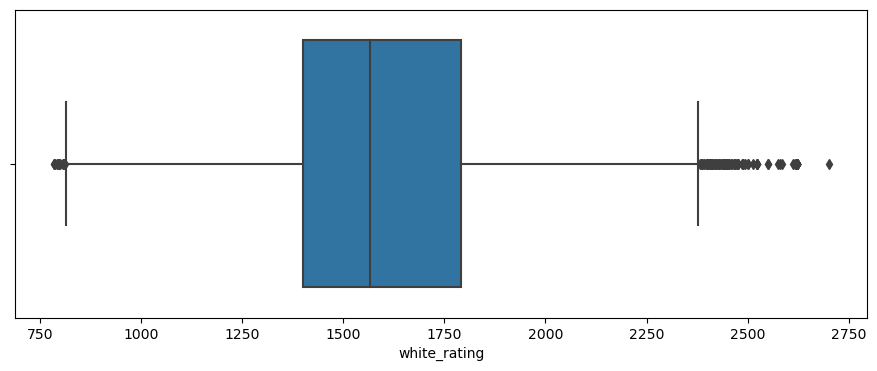

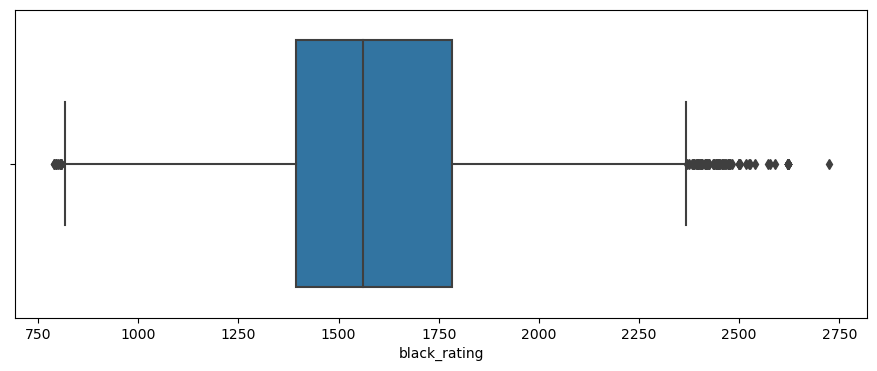

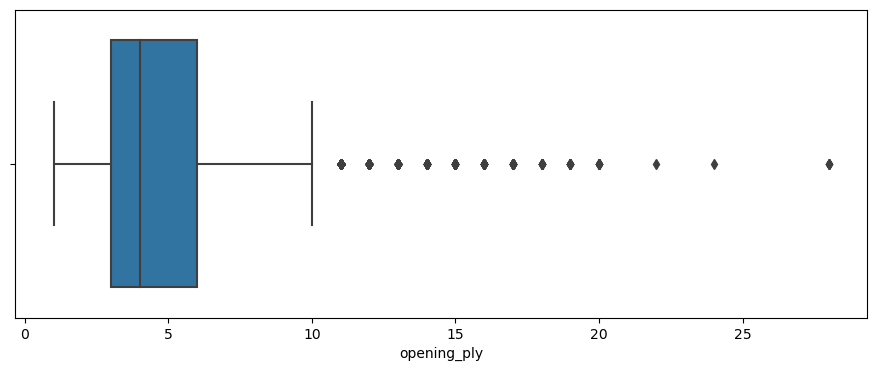

In [16]:
# Numerical data

for col in numeric_columns:
    plt.figure(figsize=(11,4))
    sns.boxplot(x=col,data=df_copy)
    plt.show()

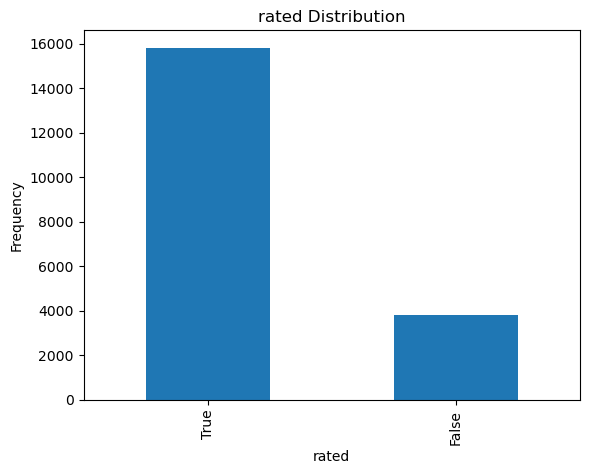

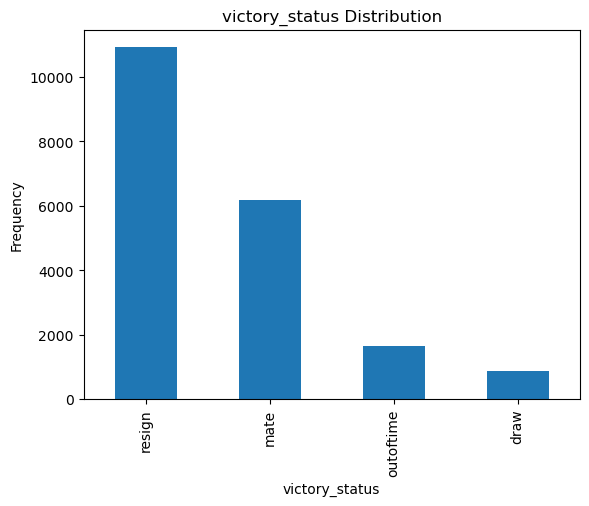

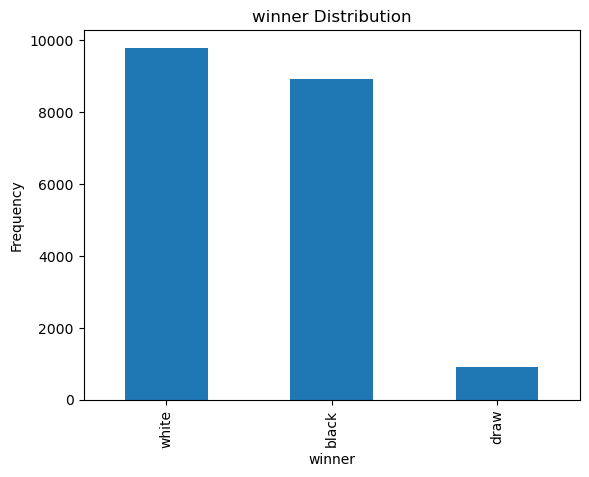

In [17]:
# Categorical data

for col in categoric_columns:
    df[col].value_counts().plot(kind='bar', title=f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Bi - Variante - Analysis 

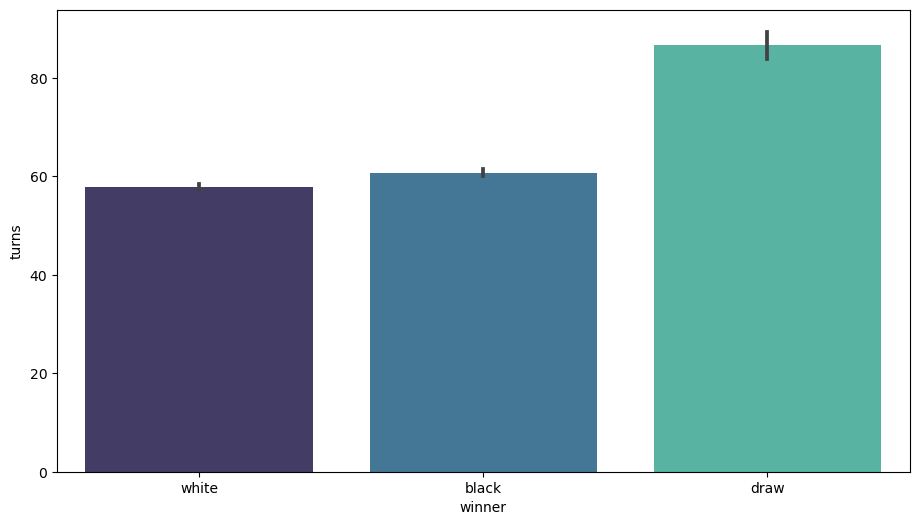

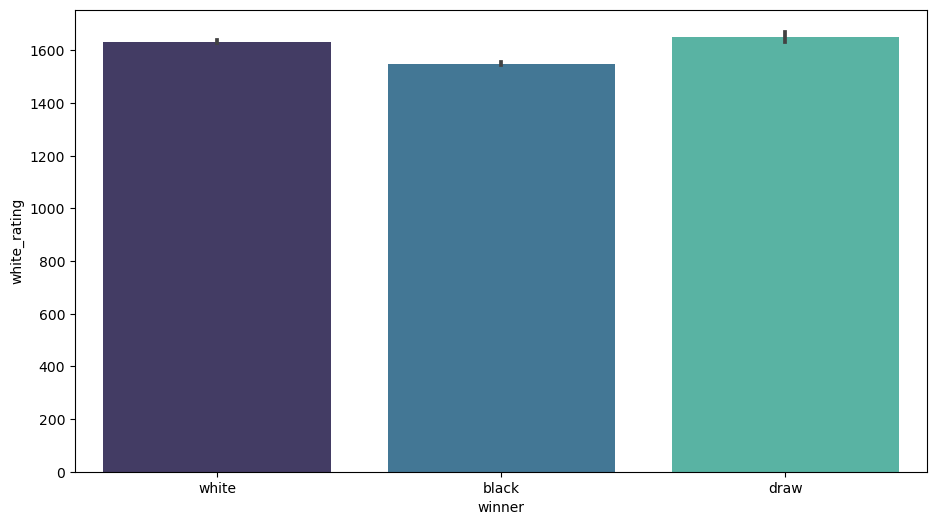

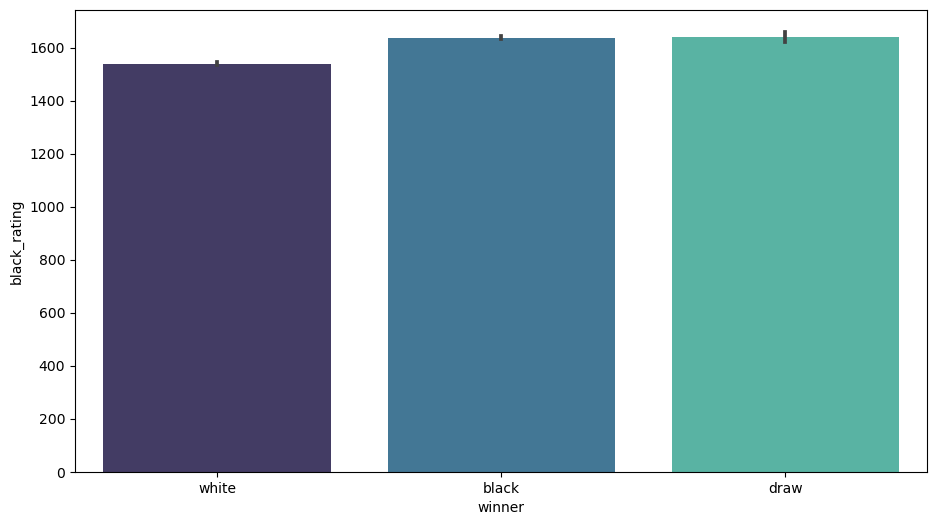

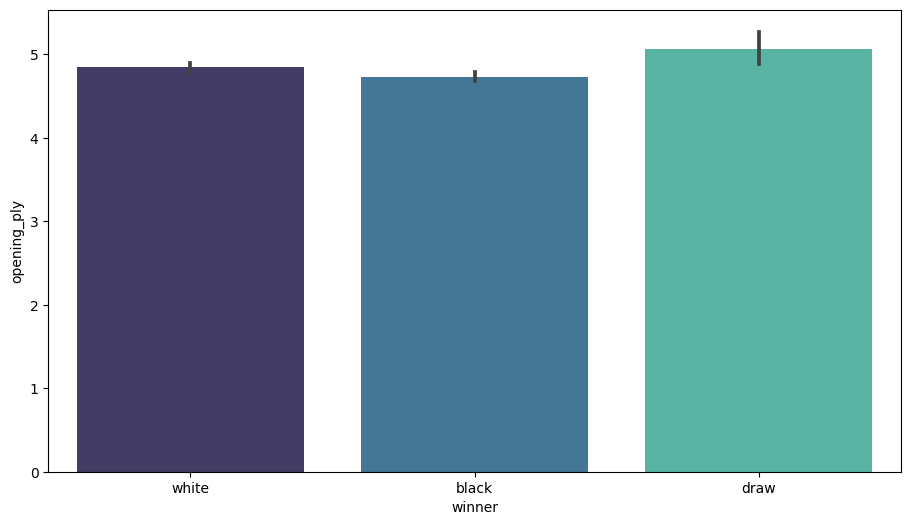

In [18]:
# Numerical vs Categorical

for col in numeric_columns:
    plt.figure(figsize=(11,6))
    sns.barplot(x='winner',y=col,data=df_copy, palette="mako")
    plt.show()

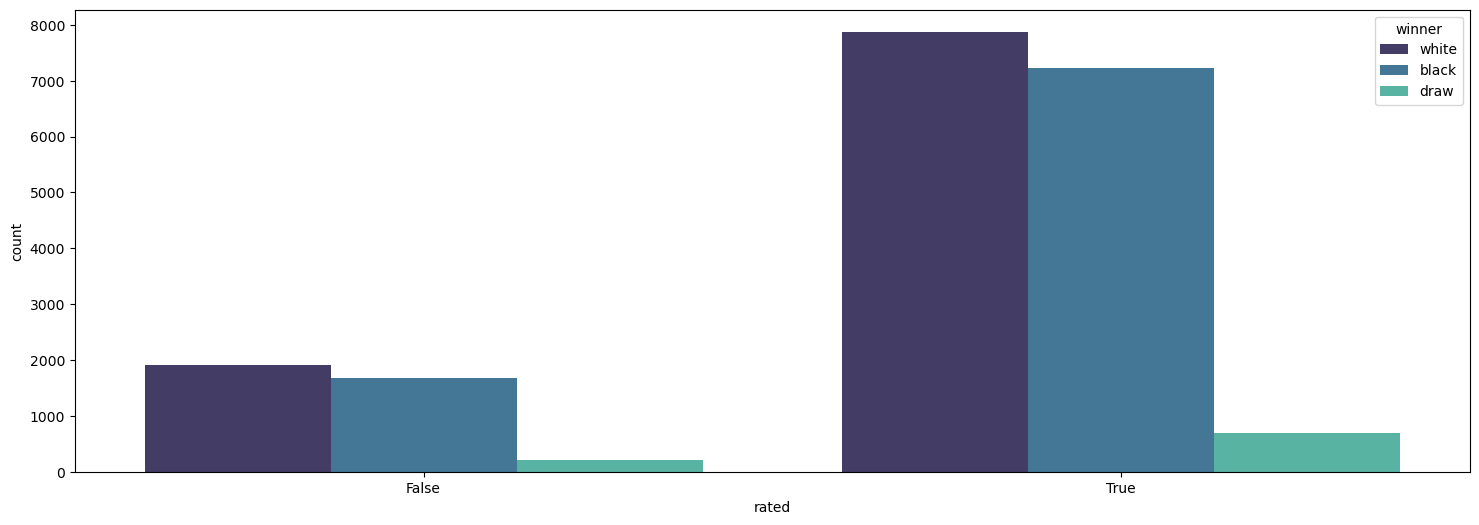

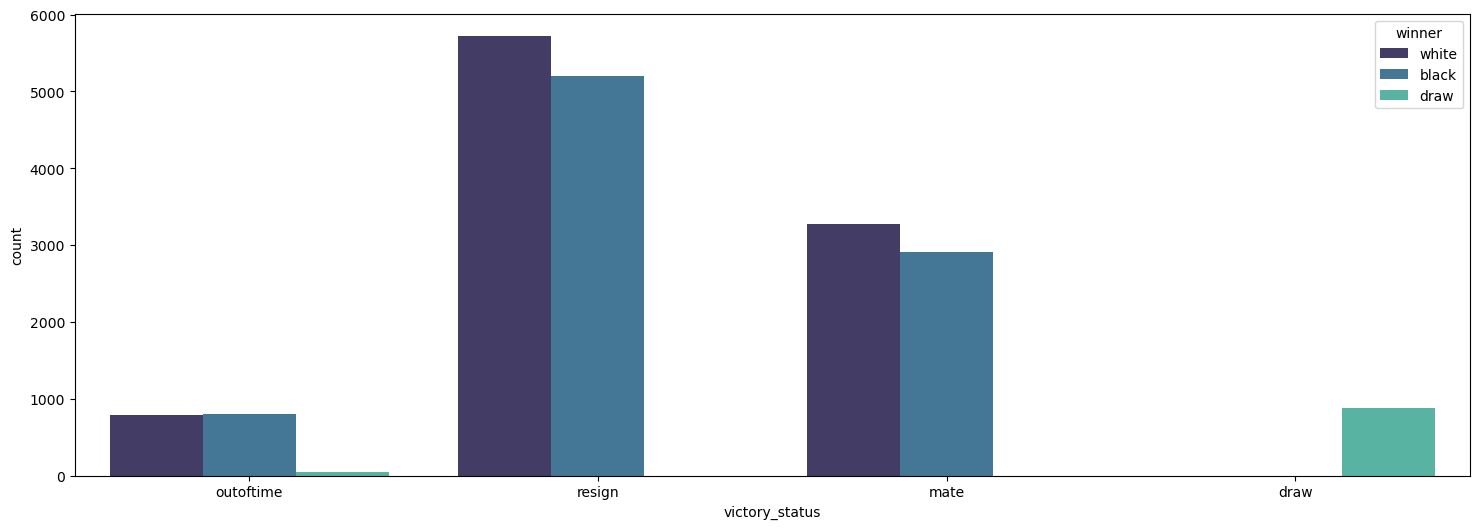

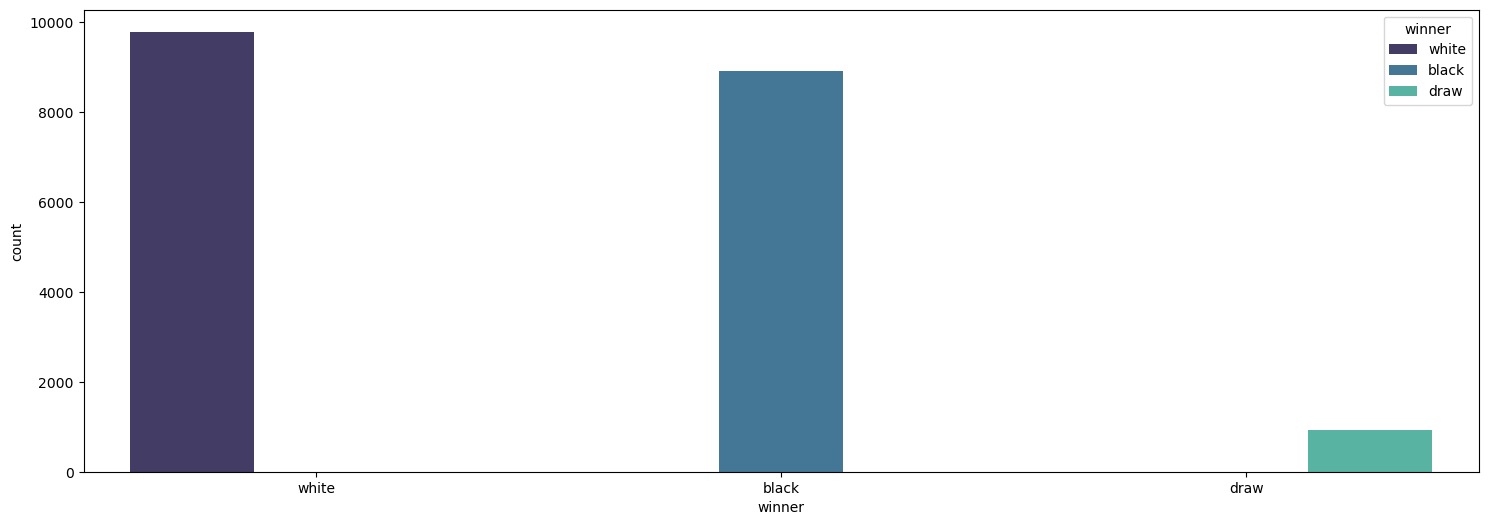

In [19]:
# Categorical vs Categorical

for col in categoric_columns:
    plt.figure(figsize=(18,6))
    sns.countplot(x=col, hue='winner', data=df_copy, palette="mako")
    plt.show()

### Multi - Variante - Analysis

C:\Users\sobhr\AppData\Local\Temp\ipykernel_16896\1316917814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(),annot=True,fmt='.2f',linewidth=.2)


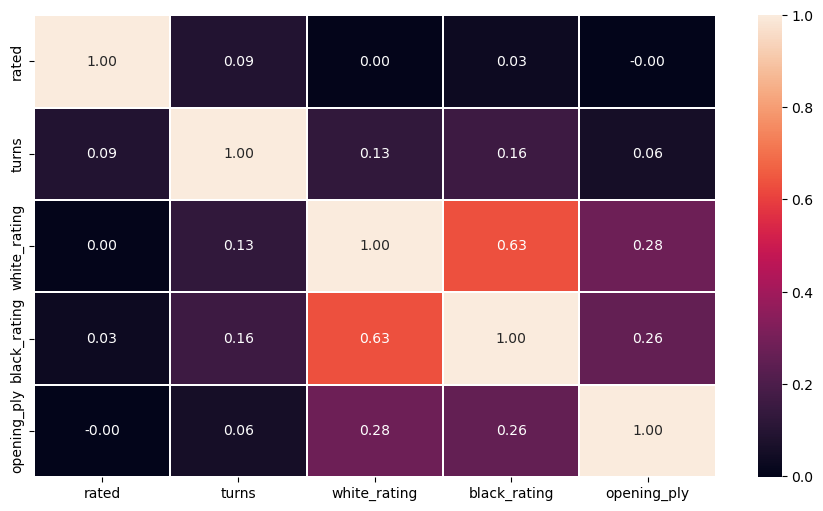

In [20]:
plt.figure(figsize=[11,6])
sns.heatmap(df_copy.corr(),annot=True,fmt='.2f',linewidth=.2)
plt.show()

#### Univariate
- Most of the Numerical data has outiers and is mostly right skewed.
- Frequency of True in rated column is highest.
- Frequency of Resign in victory status column is highest followed by Mate.
- Frequency of White in winner column is slightly higher as compared to black.

#### Bivariate
- Games whose result is Draw has highest number of turns as compared to white and black winner.
- White rating have higher number of white winner and draw games.
- Black rating have higher number of black winner and draw games.
- Opening ply has highest number of draw games.
- Outoftime has higher number of black winner while resign and mate has higher number of white winner.

#### Multivariate
- Black rating and White rating are moderately correlated.
- while other columns are not so highly correlated
- So there might not be an issue of multicolinearity in the dataset.

In [21]:
for col in df.columns[1:]:
    print("==================================================")
    print(f"Unique Values of {col.upper()}")
    print(df[col].unique())
    print("==================================================")

Unique Values of RATED
[False  True]
Unique Values of CREATED_AT
[1.50421000e+12 1.50413000e+12 1.50411000e+12 ... 1.49969788e+12
 1.49969613e+12 1.49964315e+12]
Unique Values of LAST_MOVE_AT
[1.50421000e+12 1.50413000e+12 1.50411000e+12 ... 1.49969805e+12
 1.49969707e+12 1.49964389e+12]
Unique Values of TURNS
[ 13  16  61  95   5  33   9  66 119  39  38  60  31  43  52 101  25  14
   3  17  36  69  54  53  64  21  11  19  28  22  37  34  32  71  30  41
  49   7  35   8  44  29  40  57  78  62  87  50 131  48  47  51  58 114
  20  85 113  75 135  81  46  70  91 137  18 111  90  59  26  23 118 120
  24   2  97  12  72 156  77  65  73 125  76  63 107 100  80 105 144 158
 117 110 178 136 124  96  10 106  15  42 159  74 112 104 150  88  55 103
 177  82  99  67   6 115  83  89 116  27 102  45  98 108  92  56 123 129
   4 163 130 121  94  79 148 195 122 128  84  86  93 161 133  68 153 154
 160 141 132 204 140 168 127 109 174 157 142 143 170   1 138 171 145 151
 179 149 173 208 139 134 169 15

In [22]:
for col in df.columns[1:]:
    print("==================================================")
    print(f"Values Counts of {col}")
    print(df[col].value_counts())
    print("==================================================")

Values Counts of rated
True     15817
False     3812
Name: rated, dtype: int64
Values Counts of created_at
1.504210e+12    45
1.504140e+12    39
1.504200e+12    38
1.503860e+12    37
1.504050e+12    32
                ..
1.500224e+12     1
1.500223e+12     1
1.500222e+12     1
1.500221e+12     1
1.499643e+12     1
Name: created_at, Length: 13151, dtype: int64
Values Counts of last_move_at
1.504210e+12    46
1.504140e+12    39
1.504200e+12    35
1.503860e+12    34
1.504040e+12    33
                ..
1.500133e+12     1
1.500132e+12     1
1.500112e+12     1
1.500112e+12     1
1.499644e+12     1
Name: last_move_at, Length: 13186, dtype: int64
Values Counts of turns
45     298
53     297
41     293
51     292
57     292
      ... 
221      1
184      1
208      1
176      1
201      1
Name: turns, Length: 211, dtype: int64
Values Counts of victory_status
resign       10926
mate          6188
outoftime     1641
draw           874
Name: victory_status, dtype: int64
Values Counts of winner
w

0.0           8533
10000000.0     732
20000000.0       3
754889.0         2
920151.0         2
              ... 
855315.0         1
734207.0         1
1213270.0        1
368427.0         1
736699.0         1
Name: match_duration, Length: 10327, dtype: int64


## Summary 


- rated: Most of the matches in the dataset are rated (True) compared to unrated matches (False).

- created_at and last_move_at: These columns represent the timestamp of when the game was created and the last move was made, respectively. There is a variety of timestamps, indicating matches were created and ended at various times.
- turns: The number of turns in a game varies significantly, ranging from 1 to 221. The most common number of turns seems to be around 45-53.
- victory_status: The majority of games ended in resignation, followed by checkmate (mate), out of time (outoftime), and draws.
- winner:In terms of winners, White wins slightly more often than Black, with a noticeable number of draws.
- increment_code: This column indicates the time control for each match, with various formats and time controls present.
- white_id and black_id: These columns represent the usernames or IDs of white and black players, respectively.There is a variety of usernames, indicating matches involve different players.
- white_rating and black_rating: These columns represent the Elo ratings of white and black players, respectively.Ratings range from 1 to 2700, with various ratings represented in the dataset.
- moves: This column represents the sequence of moves made in the game.Various opening moves and strategies are evident, with some games ending quickly and others having longer sequences of moves.
- opening_eco and opening_name: These columns represent the openings used in the games, categorized by the Encyclopedia of Chess Openings (ECO) code and the opening name.Several openings are popular, with Van't Kruijs Opening and Sicilian Defense being common.
- opening_ply: This column represents the number of moves played in the opening phase.Most openings consist of 2-7 moves.
- match_duration: This column indicates the duration of each match.Most matches have a duration of 0, likely indicating rapid or blitz games, while others have various durations.

## 2. Using the opening moves, opening styles, color, and other features, Is it possible to predict the winner of a match to a certain degree? Explain your answer.

In [23]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'match_duration'],
      dtype='object')

In [24]:
# Removing some non usefull columns for modelling
df.drop(['id','white_id','black_id'],inplace=True,axis=1)

### Lets Try some Base models first

In [25]:
# Extract relevant features and target variable
X = df.drop(columns=['winner'])
y = df['winner']

# Apply label encoding
label_encoder = preprocessing.LabelEncoder()  
X_encoded = X.apply(label_encoder.fit_transform)

# Apply scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

classifiers = [[KNeighborsClassifier(), 'K-Nearest Neighbours'],[GaussianNB(),'GaussianNB'],
    [DecisionTreeClassifier(),'Decision Tree Classifier'],[LogisticRegression(),'Logistic Regression']]

In [26]:
def predict(X_train, y_train,X_test,y_test):
    for cls in classifiers:
        model = cls[0]
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        print(cls[1])
        print("Accuracy : ", accuracy_score(y_test, y_pred) *  100)

In [27]:
predict(X_train, y_train,X_test,y_test)

K-Nearest Neighbours
Accuracy :  57.819663779928675
GaussianNB
Accuracy :  62.302598064187464
Decision Tree Classifier
Accuracy :  61.23280692817117
Logistic Regression
Accuracy :  65.05348955680081


### Random forest

In [28]:
model = RandomForestClassifier(random_state=4)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Model Evaluation:
Accuracy: 0.6668364747834946
Classification Report:
              precision    recall  f1-score   support

       black       0.64      0.61      0.62      1779
        draw       1.00      0.94      0.97       197
       white       0.66      0.69      0.67      1950

    accuracy                           0.67      3926
   macro avg       0.77      0.75      0.76      3926
weighted avg       0.67      0.67      0.67      3926



### Feature importance

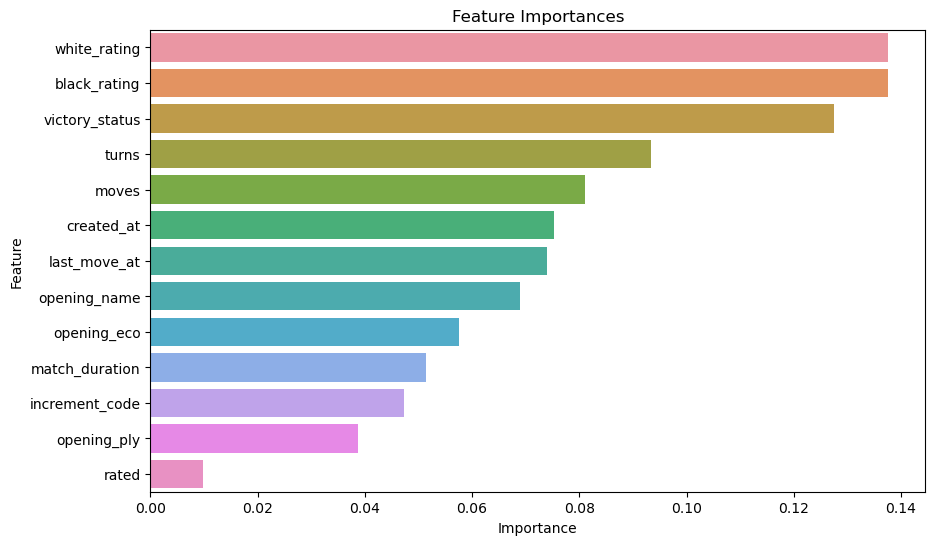

In [29]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### After Selecting Important Features

In [30]:
# We will select Top 5 features for furthur modelling and see if it improves our model.

df.drop(['rated','opening_ply','created_at','increment_code','last_move_at','match_duration','opening_eco', 'opening_name'],inplace=True,axis=1)

In [31]:
X = df.drop(columns=['winner'])
y = df['winner']

# Apply label encoding
label_encoder = preprocessing.LabelEncoder()  
X_encoded = X.apply(label_encoder.fit_transform)

# Apply scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the scaled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# Choose a machine learning algorithm (Random Forest Classifier in this case)
model = RandomForestClassifier(random_state=4)

# Train the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Model Evaluation:
Accuracy: 0.6935812531839022
Classification Report:
              precision    recall  f1-score   support

       black       0.67      0.65      0.66      1779
        draw       1.00      0.95      0.97       197
       white       0.69      0.71      0.70      1950

    accuracy                           0.69      3926
   macro avg       0.78      0.77      0.78      3926
weighted avg       0.69      0.69      0.69      3926



### Hyper Parameter Tuning

In [32]:
# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=4)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Model Evaluation:
Accuracy: 0.6915435557819664
Classification Report:
              precision    recall  f1-score   support

       black       0.67      0.64      0.65      1779
        draw       1.00      0.94      0.97       197
       white       0.68      0.71      0.70      1950

    accuracy                           0.69      3926
   macro avg       0.78      0.76      0.77      3926
weighted avg       0.69      0.69      0.69      3926



### Smote

In [33]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the model (you can use any classifier)
model = RandomForestClassifier(random_state=4)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Model Evaluation:
Accuracy: 0.6946001018848701
Classification Report:
              precision    recall  f1-score   support

       black       0.66      0.67      0.67      1779
        draw       0.93      0.97      0.95       197
       white       0.70      0.69      0.69      1950

    accuracy                           0.69      3926
   macro avg       0.76      0.78      0.77      3926
weighted avg       0.69      0.69      0.69      3926



## Modelling Summary

Using the opening moves, opening styles, color, and other features, Is it possible to predict the winner of a match to a certain degree?
- Answer to above Question is No, As our model is only able to predict 69 percent of data pattern which is very low according to my understanding of business problem.

I did following steps for modelling and evaluation :-
- Did Label Encoding as our data was having large number of categorical data with many levels.
- Did MinMax Scaling as our data was skewed and had outliers.
- First I tried some base models like KNN, GaussianNB, Logistic Regression, Decision Tree Classifier. All of them didnt performed well. 
- Then Random forest model was build but it only gave 67 percent accuracy also F1 score were very low for all classes.
- Furthur using feature importance I selected top 5 features to see if there is any improvement in predictions but that was also not so effective.
- Furthur more I tried Hyper parameter tuning but still the model did not perform well.
- So for the final step i tried smote which also didnt worked well in this case

* So after all this I came to conclusion that our model is underfitting and we need more training data for better prediction of winner.

